In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, normalize
from sklearn.neighbors import LocalOutlierFactor

In [2]:
df = pd.read_csv('Gt_full.csv')
df

,Unnamed: 0,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,2,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,4,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,5,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028
...,...,...,...,...,...,...,...,...,...,...,...,...
36728,36729,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.99300,89.172
36729,36730,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.14400,88.849
36730,36731,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.41400,96.147
36731,36732,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,3.31340,64.738


In [3]:
df.corr()

,Unnamed: 0,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
Unnamed: 0,1.000000,0.057621,0.042398,-0.182817,-0.260299,0.031658,-0.125494,0.136456,-0.050094,-0.037291,0.178371,-0.333819
AT,0.057621,1.000000,-0.406601,-0.476291,0.251974,0.045851,0.183706,0.281869,-0.091152,0.015287,-0.174326,-0.558174
AP,0.042398,-0.406601,1.000000,-0.015184,-0.040363,0.057533,-0.005390,-0.225601,0.118224,0.102636,0.067050,0.191938
AH,-0.182817,-0.476291,-0.015184,1.000000,-0.147840,-0.235153,-0.221809,0.022965,-0.137360,-0.196275,0.106586,0.164617
AFDP,-0.260299,0.251974,-0.040363,-0.147840,1.000000,0.678485,0.691292,-0.466882,0.665483,0.702568,-0.448425,-0.188247
GTEP,0.031658,0.045851,0.057533,-0.235153,0.678485,1.000000,0.874234,-0.699703,0.964127,0.978470,-0.518909,-0.201630
TIT,-0.125494,0.183706,-0.005390,-0.221809,0.691292,0.874234,1.000000,-0.380862,0.910297,0.908469,-0.706275,-0.213865
TAT,0.136456,0.281869,-0.225601,0.022965,-0.466882,-0.699703,-0.380862,1.000000,-0.682396,-0.706438,0.058353,-0.092791
TEY,-0.050094,-0.091152,0.118224,-0.137360,0.665483,0.964127,0.910297,-0.682396,1.000000,0.988778,-0.569813,-0.116127
CDP,-0.037291,0.015287,0.102636,-0.196275,0.702568,0.978470,0.908469,-0.706438,0.988778,1.000000,-0.551027,-0.171256


<Axes: >

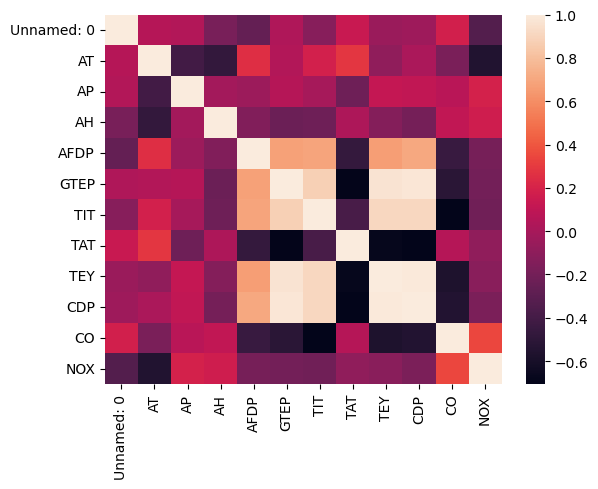

In [4]:
corr = df.select_dtypes('number').corr()
sns.heatmap(corr)

In [5]:
corr.loc['NOX']

Unnamed: 0   -0.333819
AT           -0.558174
AP            0.191938
AH            0.164617
AFDP         -0.188247
GTEP         -0.201630
TIT          -0.213865
TAT          -0.092791
TEY          -0.116127
CDP          -0.171256
CO            0.340606
NOX           1.000000
Name: NOX, dtype: float64

Met deze code berekenen we de correlaties tussen de kolommen. Hiervan pakken we de kolommen met de hoogste waardes.Deze kolommen zijn AT,CO,TIT,GTEP en AP. We kijken hier naar de waardes met de hoogste positieve correlatie of negatieve correlatie. Nu we dit weten gaan we een regressie model maken met de genoemde variabelen. 

In [6]:
feature_list = ['AT','AP','CO','TIT','GTEP']
features = df[feature_list]
scaler = MinMaxScaler()
features = scaler.fit_transform(features)
features = normalize(features)

NOX = df.NOX

In [7]:
# data verdelen in trainingsets en testsets
X_train, X_test, y_train, y_test = train_test_split(features, NOX, test_size=0.33, random_state=42)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))


Coefficients: 
 [-76.77808747 -32.17503865  77.59029895   8.93656916 -56.05367497]
Mean squared error: 64.70
Coefficient of determination: 0.51


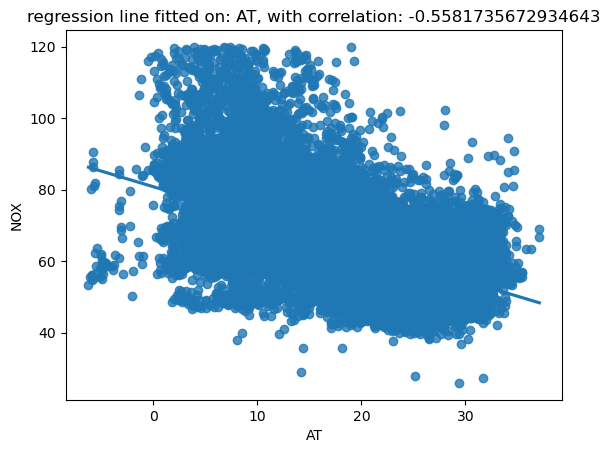

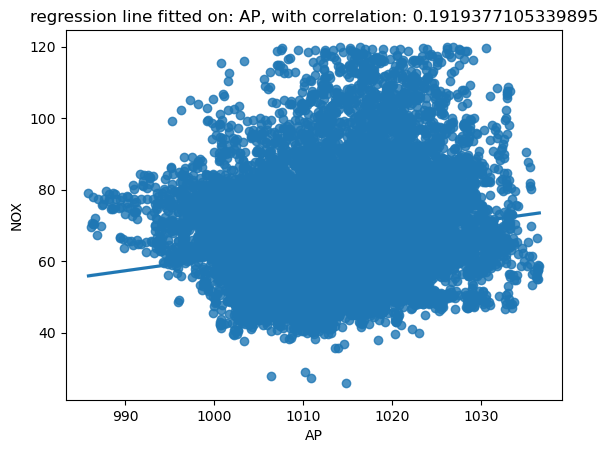

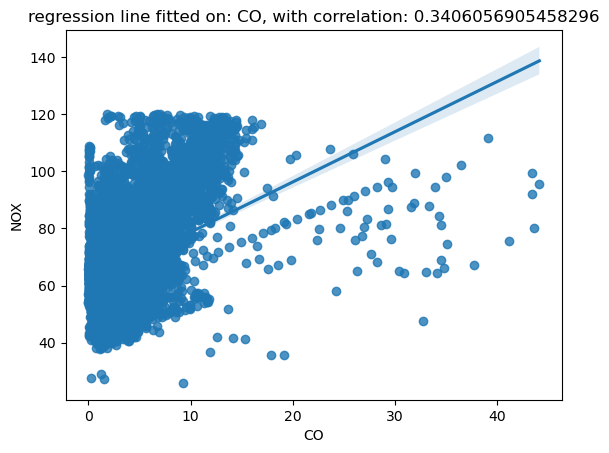

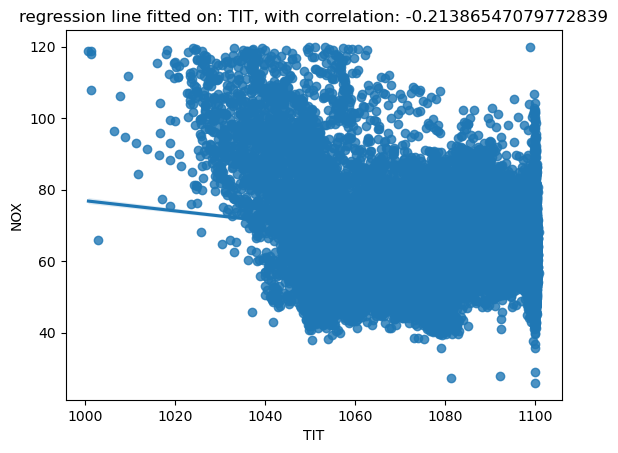

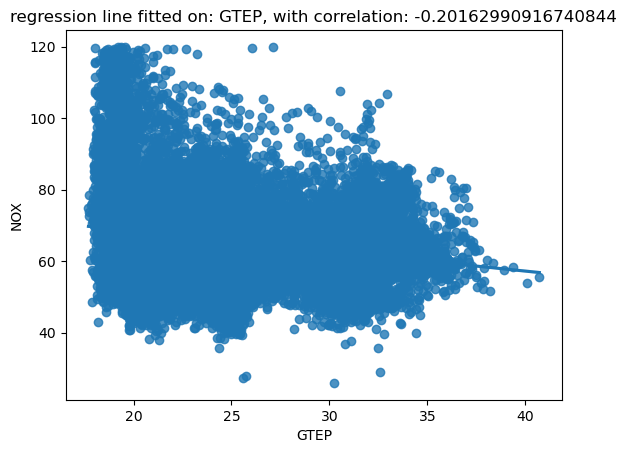

In [8]:
for feature in feature_list:
    sns.regplot(x = feature, y = 'NOX', data = df)
    corr_val = df[[feature,'NOX']].corr()[feature]['NOX']
    plt.title(f'regression line fitted on: {feature}, with correlation: {corr_val}')
    plt.show()

Deze grafieken geven weer wat voor correlatie er is tussen de verschillende variabelen. De scatterplot zijn de waardes van NOX en de lijn is de regressielijn van de verschillende variablen die zijn gebruikt.

In [9]:
lof = LocalOutlierFactor(contamination=0.15, n_neighbors=60, novelty=False)
valid_points = lof.fit_predict(features) # Find outliers
mask = valid_points != -1 # Remove outliers
filtered_df = df.iloc[mask,:]

filtered_features = features[mask,:]
filtered_NOX = NOX[mask]


# data verdelen in trainingsets en testsets
X_train, X_test, y_train, y_test = train_test_split(filtered_features, filtered_NOX, test_size=0.33, random_state=42)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [-81.40073139 -39.2503259  101.78115935  14.70736828 -56.31860374]
Mean squared error: 60.23
Coefficient of determination: 0.53


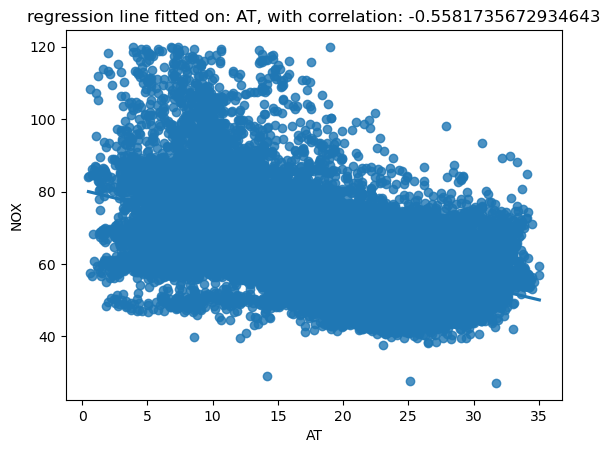

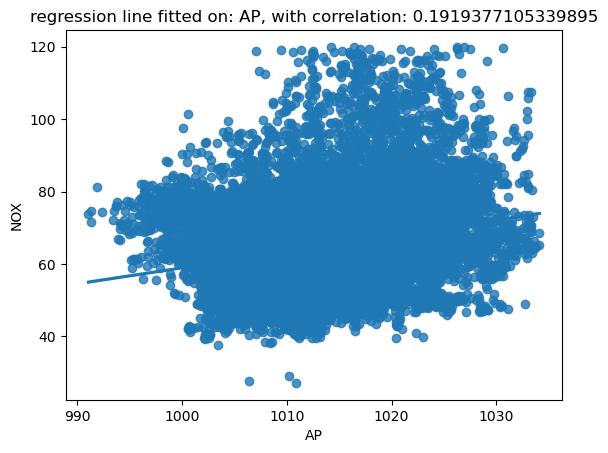

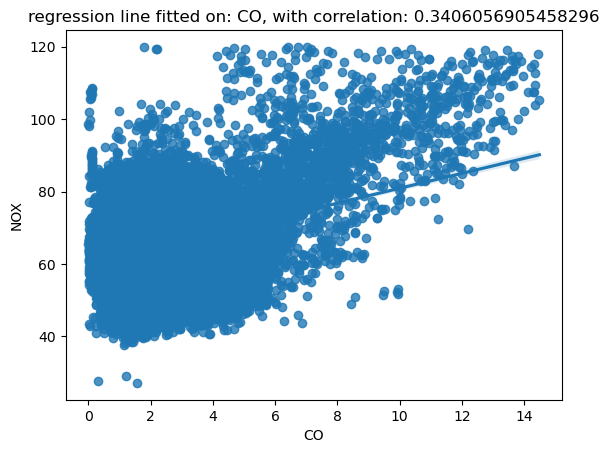

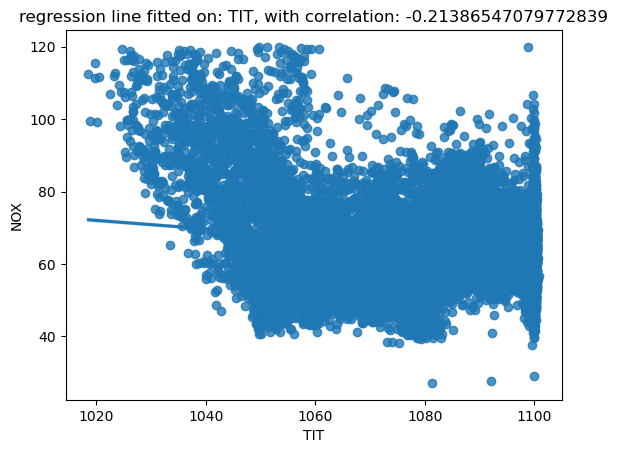

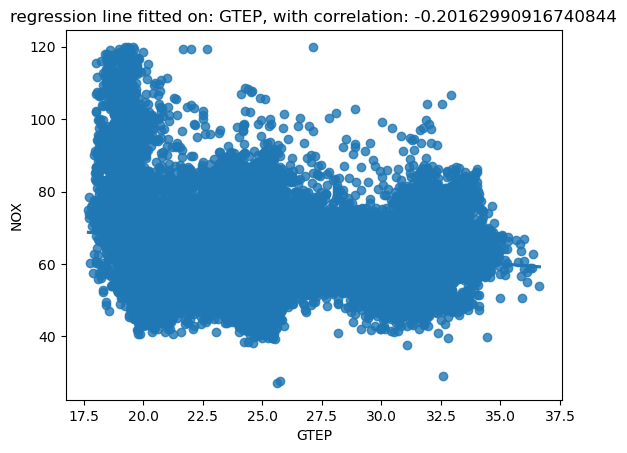

In [10]:
for feature in feature_list:
    sns.regplot(x = feature, y = 'NOX', data = filtered_df)
    corr_val = df[[feature,'NOX']].corr()[feature]['NOX']
    plt.title(f'regression line fitted on: {feature}, with correlation: {corr_val}')
    plt.show()

Deze grafieken zijn de uitkomsten van ons regressiemodel met 15% van de outliers weg gehaald. Dit is gedaan zodat je een beter correlatie krijgt door outliers weg te halen. (outliers zijn data punten die afwijken van de normale trent.)